Vegetable Image Classification using CNN
Based on Manchanda project "https://www.kaggle.com/code/chitwanmanchanda/vegetable-image-classification-using-cnn/notebook"
Dataset: "https://www.researchgate.net/publication/352846889_DCNN-Based_Vegetable_Image_Classification_Using_Transfer_Learning_A_Comparative_Study"

In [1]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import os, shutil
import warnings
warnings.filterwarnings('ignore')

Visualize Images

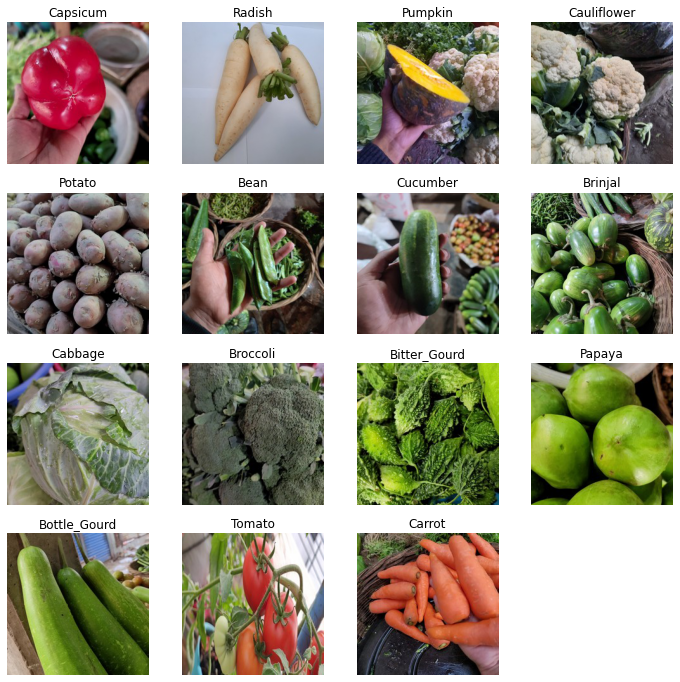

In [2]:
# Plot images
train_path = "./Vegetable Images/train"
validation_path = "./Vegetable Images/validation"
test_path = "./Vegetable Images/test"

image_categories = os.listdir('./Vegetable Images/train')

def plot_images(image_categories):
    #Create Figure
    plt.figure(figsize=(12, 12))
    for i, category in enumerate(image_categories):
        # Load Images for each category
        image_path = train_path + '/' + category
        images_in_folder = os.listdir(image_path)
        first_image_of_folder = images_in_folder[0]
        first_image_path = image_path + '/' + first_image_of_folder
        img = tf.keras.preprocessing.image.load_img(first_image_path)
        img_arr = tf.keras.preprocessing.image.img_to_array(img)/255.0
        
        # Create Subplot and plot the images
        plt.subplot(4, 4, i+1)
        plt.imshow(img_arr)
        plt.title(category)
        plt.axis("off")
    plt.show()
    
plot_images(image_categories)

Prepare the Data

In [3]:
# Create Image Data Generator for Train, Validation and Test Set

# Train Set 
train_gen = ImageDataGenerator(rescale = 1.0/255.0) #Normalise Data
train_image_generator = train_gen.flow_from_directory(train_path, target_size=(150, 150), batch_size=32, class_mode='categorical')

# Validation Set
val_gen = ImageDataGenerator(rescale = 1.0/255.0) #Normalise Data
val_image_generator = train_gen.flow_from_directory(validation_path, target_size=(150, 150), batch_size=32, class_mode='categorical')

# Test Set
test_gen = ImageDataGenerator(rescale = 1.0/255.0) # Normalise Data
test_image_generator = train_gen.flow_from_directory(test_path, target_size=(150, 150), batch_size=32, class_mode='categorical')


Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


In [4]:
# Print the class encodings done by the generators
class_map = dict([(v,k) for k, v in train_image_generator.class_indices.items()])
print(class_map)

{0: 'Bean', 1: 'Bitter_Gourd', 2: 'Bottle_Gourd', 3: 'Brinjal', 4: 'Broccoli', 5: 'Cabbage', 6: 'Capsicum', 7: 'Carrot', 8: 'Cauliflower', 9: 'Cucumber', 10: 'Papaya', 11: 'Potato', 12: 'Pumpkin', 13: 'Radish', 14: 'Tomato'}


Build CNN Model

In [5]:
# Build Custom Sequential CNN model

model = Sequential() # model object

# Add Layers
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=[150, 150, 3]))
model.add(MaxPooling2D(2, ))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding ='same', activation='relu'))
model.add(MaxPooling2D(2))

# Flatten the feature map
model.add(Flatten())

# Add the fully connected layers
model.add(Dense(128, activation='relu'))
model.add((Dropout(0.25)))
model.add(Dense(128, activation='relu'))
model.add(Dense(15, activation='softmax'))

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 87616)             0         
                                                                 
 dense (Dense)               (None, 128)               1

2022-06-02 17:00:37.758301: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
# Compile and fit the model

early_stopping = keras.callbacks.EarlyStopping(patience=5) # Set up callbacks
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics='accuracy')
hist = model.fit(train_image_generator, epochs=100, verbose=1, validation_data=val_image_generator, steps_per_epoch=15000//32, validation_steps=3000//32, callbacks=early_stopping)

Epoch 1/100
468/468 [==============================] - 182s 387ms/step - loss: 1.0010 - accuracy: 0.6700 - val_loss: 0.5303 - val_accuracy: 0.8340
Epoch 2/100
468/468 [==============================] - 166s 355ms/step - loss: 0.5507 - accuracy: 0.8203 - val_loss: 0.3565 - val_accuracy: 0.8935
Epoch 3/100
468/468 [==============================] - 165s 352ms/step - loss: 0.3425 - accuracy: 0.8888 - val_loss: 0.3187 - val_accuracy: 0.9116
Epoch 4/100
468/468 [==============================] - 166s 355ms/step - loss: 0.2465 - accuracy: 0.9203 - val_loss: 0.2663 - val_accuracy: 0.9325
Epoch 5/100
468/468 [==============================] - 164s 351ms/step - loss: 0.1885 - accuracy: 0.9379 - val_loss: 0.2821 - val_accuracy: 0.9288
Epoch 6/100
468/468 [==============================] - 165s 352ms/step - loss: 0.1718 - accuracy: 0.9441 - val_loss: 0.2350 - val_accuracy: 0.9402
Epoch 7/100
468/468 [==============================] - 227s 485ms/step - loss: 0.1476 - accuracy: 0.9524 - val_loss: 0

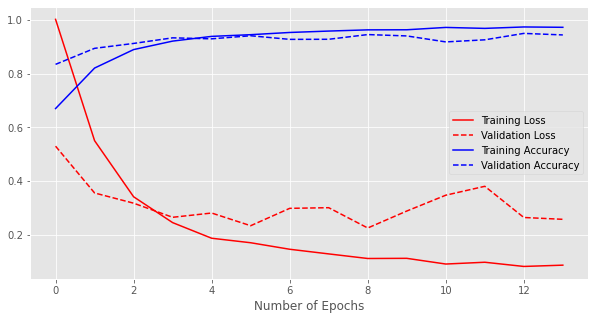

In [9]:
# Plot the error and accuracy
h = hist.history
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.plot(h['loss'],  c='red',  label='Training Loss')
plt.plot(h['val_loss'], c='red', linestyle='--', label='Validation Loss')
plt.plot(h['accuracy'], c='blue', label='Training Accuracy')
plt.plot(h['val_accuracy'], c='blue', linestyle='--', label='Validation Accuracy')
plt.xlabel("Number of Epochs")
plt.legend(loc='best')
plt.show()

In [10]:
# Predict the accuracy for the test set
model.evaluate(test_image_generator)

94/94 [==============================] - 9s 100ms/step - loss: 0.2363 - accuracy: 0.9443


[0.23631656169891357, 0.9443333148956299]

1/1 [==============================] - 0s 149ms/step


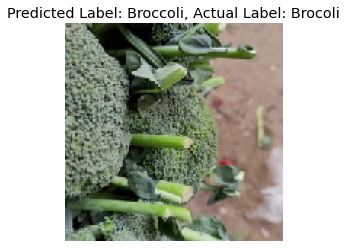

In [13]:
# Testing the Model
test_image_path = './Vegetable Images/test/Broccoli/1011.jpg'

def generate_predictions(test_image_path, actual_label):
    # Load and preprocess the image
    test_img = tf.keras.preprocessing.image.load_img(test_image_path, target_size=(150, 150))
    test_img_arr = tf.keras.preprocessing.image.img_to_array(test_img)/255.0
    test_img_input = test_img_arr.reshape((1, test_img_arr.shape[0], test_img_arr.shape[1], test_img_arr.shape[2]))
    
    # Make Predictions
    predicted_label = np.argmax(model.predict(test_img_input))
    predicted_vegetable = class_map[predicted_label]
    plt.figure(figsize=(4, 4))
    plt.imshow(test_img_arr)
    plt.title("Predicted Label: {}, Actual Label: {}".format(predicted_vegetable, actual_label))
    plt.grid()
    plt.axis('off')
    plt.show()
    
generate_predictions(test_image_path, actual_label='Brocoli')

In [14]:
# Test model on an external image
!wget "https://www.dropbox.com/s/i020rz847u8bq09/beans.jpg?dl=0"

--2022-06-03 00:20:50--  https://www.dropbox.com/s/i020rz847u8bq09/beans.jpg?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 2620:100:6017:18::a27d:212, 162.125.2.18
Connecting to www.dropbox.com (www.dropbox.com)|2620:100:6017:18::a27d:212|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/i020rz847u8bq09/beans.jpg [following]
--2022-06-03 00:20:51--  https://www.dropbox.com/s/raw/i020rz847u8bq09/beans.jpg
Reusing existing connection to [www.dropbox.com]:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc085a61a5585805ad076ab417ca.dl.dropboxusercontent.com/cd/0/inline/BmfSOkb9DnPwLjsYT8Mt8jiZ0l9CoZuPwfhqzIZMVpJ6f3A2xGwRUcO-gEjbmr64wMX-rhunMOqz7dZOcPBBEWgC0o5cGrtdyAQt-aen9rYk7Uuo0vbyurpaLxiJOLPDt0YXzw5Wz4fuXKbN6WDg2qMydTanvpZRG9V5h2xvXeDohQ/file# [following]
--2022-06-03 00:20:51--  https://uc085a61a5585805ad076ab417ca.dl.dropboxusercontent.com/cd/0/inline/BmfSOkb9DnPwLjsYT8Mt8jiZ0l9CoZuPwfhqzIZMVpJ6f3A2xGwRUcO-

In [15]:
!wget "https://www.dropbox.com/s/lge1plvr4mg5w7y/potato_2.jpg?dl=0"

--2022-06-03 00:21:09--  https://www.dropbox.com/s/lge1plvr4mg5w7y/potato_2.jpg?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 2620:100:6017:18::a27d:212, 162.125.2.18
Connecting to www.dropbox.com (www.dropbox.com)|2620:100:6017:18::a27d:212|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/lge1plvr4mg5w7y/potato_2.jpg [following]
--2022-06-03 00:21:10--  https://www.dropbox.com/s/raw/lge1plvr4mg5w7y/potato_2.jpg
Reusing existing connection to [www.dropbox.com]:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd1c9b4f978cb694ecc982d6b7d.dl.dropboxusercontent.com/cd/0/inline/BmezntO7B03DsROGwkCwrTCocz_boelaN-5uA9ACV5A_EgOjs0PKbkPYM1X5FEmWlirJXHisxmUvw-1-QmyE9OgOEw-C2ZogcjYbqt7EC-hqtqNZHcMg0ReVlcFts_GvOE8UeikqQJ3sHBbnhvFGcLtTaPLev7DJjLY2zxaaL4s5Hg/file# [following]
--2022-06-03 00:21:10--  https://ucd1c9b4f978cb694ecc982d6b7d.dl.dropboxusercontent.com/cd/0/inline/BmezntO7B03DsROGwkCwrTCocz_boelaN-5uA9ACV5A_EgO

1/1 [==============================] - 0s 29ms/step


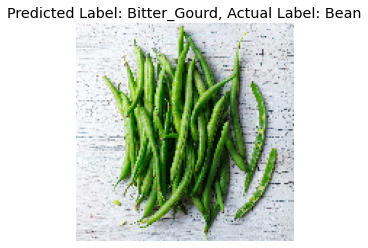

In [16]:
# Generate predictions for external images
external_image_path_1 = "./beans.jpg?dl=0"
generate_predictions(external_image_path_1, actual_label='Bean')

1/1 [==============================] - 0s 26ms/step


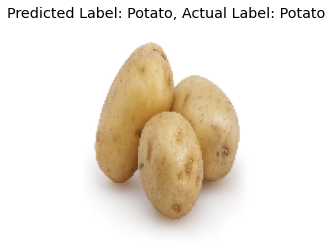

In [17]:
# Generate predictions for external image
external_image_path_2 = "./potato_2.jpg?dl=0"
generate_predictions(external_image_path_2, actual_label='Potato')